# Classification: World Value Survey Dataset

In [28]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import statsmodels.api as sm
import scipy as ap
import os
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

## 1. Explore and prepare the data

### 1. Load the data. How many responses and variables do we have?

In [2]:
#Loading the data
path = os.getcwd()
dataPath = path + "/world value survey/wvs.csv.bz2"
wvsData= pd.read_csv(dataPath,sep="\t") #separator is \t since this is a tab separated file
wvsData.head()

,V2,V4,V5,V6,V7,V8,V9,V10,V11,V12,...,MN_228S8,MN_229A,MN_230A,MN_233A,MN_237B1,MN_249A1,MN_249A3,I_RELIGBEL,I_NORM1,I_VOICE1
0,12,1,1,1,-2,1,1,2,1,1,...,3,-3,-3,-3,-3,1,1,0.0,1.0,0.00
1,12,1,2,3,4,2,2,2,2,2,...,3,-3,-3,-3,-3,2,-1,0.0,1.0,0.66
2,12,1,3,2,4,2,1,2,2,2,...,4,1,1,2,-3,1,1,0.0,1.0,0.33
3,12,1,1,3,4,3,1,2,1,2,...,2,2,1,2,-3,1,2,0.0,1.0,0.00
4,12,1,1,1,2,1,1,1,3,2,...,2,2,1,2,-3,1,2,0.0,1.0,0.66


In [3]:
wvsData.shape

(90350, 328)

There are 90350 responses and about 328 variables in this data set

### 2. Create a summary table over all responses for V204: is abortion justiable. How many non-missing responses (i.e. positive answers) do you find? What is the opinion about the abortion among the global pool of respondents?

In [4]:
v204 = wvsData.V204
print("\nDescription of the V204 Variable that denotes abortion\n\n",v204.describe())
print("\n\nNumber of missing values for this variable is",v204.isna().sum())


Description of the V204 Variable that denotes abortion

 count    90350.000000
mean         2.946386
std          2.964040
min         -5.000000
25%          1.000000
50%          2.000000
75%          5.000000
max         10.000000
Name: V204, dtype: float64


Number of missing values for this variable is 0


In [5]:
numOfNonRespondents = v204[v204<0]
print("\nPercentage of respondents who did not respond to the question related to abortion in this survey is ",
     len(numOfNonRespondents)/len(v204)*100,"%", sep="")
print("\nDescription of the V204 Variable (where repondents responded) that denotes abortion\n",
      v204[v204>0].describe())


Percentage of respondents who did not respond to the question related to abortion in this survey is 5.10016602102933%

Description of the V204 Variable (where repondents responded) that denotes abortion
 count    85742.000000
mean         3.225024
std          2.764319
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max         10.000000
Name: V204, dtype: float64


From above we can see that of the total number of respondents who answered the question related to abortion, the global perceptionis that abortion is almost never justifiable. This is based on the mean value of 3 for this variable.

### 3. Removing Missing values

In [6]:
#removing everything that are not positive integers for V204 and V2
wvsData = wvsData[wvsData.V204 > 0]
wvsData = wvsData[wvsData.V2 > 0]
#dropping na for all other variables
wvsData = wvsData.dropna()
print("After dropping the na values as specified, the number of observations is",wvsData.shape[0])

After dropping the na values as specified, the number of observations is 79267


### 4. In order to simplify the analysis below, create a new binary variable abortion

In [7]:
#if V204 > 3 then change it to 1 else change it to 0
wvsData['abortion'] = np.where(wvsData.V204 > 3, 1, 0)
wvsData = wvsData.drop(['V204'], 1)

### 5. Compute (pearson) correlation table between abortion and all other variables in the data. Present these variables in descending order according to the absolute value of the correlation.

In [8]:
#wvsData.loc[:, wvsData.columns != 'V204'].corr()['V204'][:]
cor = wvsData[wvsData.columns[0:]].corr(method='pearson')['abortion'][:]

In [9]:
#collating into a data fram3
corDF = pd.DataFrame({'Variable': cor.index,
                      'Coefficient':cor.values})
#displaying the data frame as per the sorted absolute values
corDF.reindex(corDF.Coefficient.abs().sort_values(ascending=False).index)

,Variable,Coefficient
327,abortion,1.000000
228,V205,0.548653
226,V203,0.485419
229,V206,0.446394
230,V207,0.418271
165,V152,-0.315280
6,V9,0.314117
227,V203A,0.291576
159,V146,0.272220
234,V210,0.257035


From above we can see the top variables that are related to the abortion variable that we just introduced. Other correlated varibales are:
1. V204- Justifiable: Abortion
2. V205- Justifiable: Divorce
3. V203- Justifiable: Homosexuality
4. V206- Justifiable: Sex before marriage
5. V207- Justifiable: Suicide
6. V152- How important is God in your life (negatively correlated
7. V9- Important in life: Religion

### 6. Convert country code V2 into dummies. First rename V2 to country. Thereafter use pd.get_dummies Afterwards, remove country variable from the data. How many rows/columns do you have now? How many country dummies does the data contain?

In [10]:
wvsData2 = wvsData.rename(index=str, columns=({'V2':'country'}))
wvsData2 = pd.get_dummies(wvsData2, columns = ['country'])
wvsData2 = wvsData2.drop('country_887', 1)

In [11]:
wvsData2.shape

(79267, 384)

Since, dummy variables (one-hot encoded variables) are used, the total number of variables increased by 56 to a total of 384 from 328. Also note that we have dropped one variable while introducing the dummies to avoid perfect multicollinearity. Total there were 56 country dummies.

## 2. Find the best model

### 2.1. k-NN Classifier

In [12]:
#Separating the features and the target variables
x = wvsData2.drop(['abortion'],1)
y = wvsData2['abortion']

In [40]:
#Separating into test and train data
#X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=1000, train_size=1000, random_state=42)
X_trainKnn, X_testKnn, y_trainKnn, y_testKnn = train_test_split(x,y, test_size=0.10, train_size=0.10, random_state=42)
print("Shape of train features:", X_trainKnn.shape)
print("Shape of train target:", y_trainKnn.shape)
print("Shape of test features:", X_testKnn.shape)
print("Shape of test target:", y_testKnn.shape)

Shape of train features: (7926, 383)
Shape of train target: (7926,)
Shape of test features: (7927, 383)
Shape of test target: (7927,)


In [41]:
#Fitting a k-NN model
neighbors = [3,5,7,9]
for i in neighbors:
    mKnn = KNeighborsClassifier(i, n_jobs=-1)
    mKnn.fit(X_trainKnn, y_trainKnn)

    #Preedicting the y_hat values
    y_predKnn = mKnn.predict(X_testKnn)
    print("Accuracy of this model when number of neighbors is",i,"is:", mKnn.score(X_testKnn, y_testKnn))

Accuracy of this model when number of neighbors is 3 is: 0.7736848744796266
Accuracy of this model when number of neighbors is 5 is: 0.7847861738362558
Accuracy of this model when number of neighbors is 7 is: 0.7899583701274127
Accuracy of this model when number of neighbors is 9 is: 0.7918506370632017


From above we see that maximum accuracy is achieved when number of neighbors is 9. Hence we will use this for our analysis.

In [42]:
mKnn = KNeighborsClassifier(9, n_jobs=-1)
mKnn.fit(X_trainKnn, y_trainKnn)

#Preedicting the y_hat values
y_predKnn = mKnn.predict(X_testKnn)
print("Accuracy of this model when number of neighbors is",9,"is:", mKnn.score(X_testKnn, y_testKnn))

Accuracy of this model when number of neighbors is 9 is: 0.7918506370632017


In [15]:
#build confusion matrix
def calculateCM(y, yPredicted):
    truePositives = 0
    falsePositives = 0
    trueNegatives = 0
    falseNegatives = 0
     
    # Caclculating the confusion matrix    
    for i in range(0, len(y)):
        if (yPredicted[i] == 1):
            if (yPredicted[i] == y[i]):
                truePositives += 1
            else:
                falsePositives += 1
        else:
            if (yPredicted[i] == y[i]):
                trueNegatives += 1
            else:
                falseNegatives += 1
 
    cm = np.array([[trueNegatives,falsePositives],[falseNegatives,truePositives]])
    cm = pd.DataFrame(cm)
    cm.columns = ["0", "1"]
    
    # Caclculating the accuracy
    accuracy = (truePositives + trueNegatives) / (truePositives + trueNegatives + falsePositives + falseNegatives)
 
    # Caclculating the precision
    precision = truePositives / (truePositives + falsePositives)
    
    # Caclculating the recall or sensitivity
    recall = truePositives / (truePositives + falseNegatives)
    
    # Caclculating the f1-score
    f1Score = 2 / ((1 / precision) + (1 / recall))
    
    df = np.array([[precision,recall,f1Score,accuracy]])
    df = pd.DataFrame(df)
    df.columns = ["precision", "recall", "f1-score", "accuracy"]
 
    print("\n\n\t\t\t\tManually calculated values are:\n\n",df)
    print("\n\nConfusion matrix:\n\n",cm)
    
    
    #Calculation of confusion matrix using builtin functions
    
    #cm2 = pd.DataFrame(classification_report(y, yPredicted))
    #cm2.columns = ["0", "1"]
    
    print("\n\n\t\t\t\tAutomatically calculated values are:\n\n",classification_report(y, yPredicted))  
    print("\n\nConfusion matrix:\n\n",confusion_matrix(y, yPredicted))
    
    #Calculating the specificity
    #specificity = trueNegatives / (trueNegatives + falsePositives)
    
    #return recall, specificity

In [43]:
calculateCM(y_testKnn, y_predKnn)



				Manually calculated values are:

    precision    recall  f1-score  accuracy
0   0.746728  0.661664  0.701627  0.791851


Confusion matrix:

       0     1
0  4337   658
1   992  1940


				Automatically calculated values are:

               precision    recall  f1-score   support

           0       0.81      0.87      0.84      4995
           1       0.75      0.66      0.70      2932

   micro avg       0.79      0.79      0.79      7927
   macro avg       0.78      0.76      0.77      7927
weighted avg       0.79      0.79      0.79      7927



Confusion matrix:

 [[4337  658]
 [ 992 1940]]


### 2.2 Logistic Regression

In [44]:
#Separating into test and train data
#X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=1000, train_size=1000, random_state=42)
X_trainLog, X_testLog, y_trainLog, y_testLog = train_test_split(x,y, test_size=0.2, random_state=42)
print("Shape of train features:", X_trainLog.shape)
print("Shape of train target:", y_trainLog.shape)
print("Shape of test features:", X_testLog.shape)
print("Shape of test target:", y_testLog.shape)

Shape of train features: (63413, 383)
Shape of train target: (63413,)
Shape of test features: (15854, 383)
Shape of test target: (15854,)


In [72]:
#Fitting a logistic model
mLog = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr', 
                                   max_iter = 100, n_jobs = -1, warm_start = True)
mLog.fit(X_trainLog, y_trainLog)

#Preedicting the y_hat values
y_predLog = mLog.predict(X_testLog)
print("Accuracy of this model is:", mLog.score(X_testLog, y_testLog))


Accuracy of this model is: 0.8353097010218241


In [51]:
calculateCM(y_testLog, y_predLog)



				Manually calculated values are:

    precision    recall  f1-score  accuracy
0    0.80213  0.734474  0.766813   0.83531


Confusion matrix:

       0     1
0  8950  1059
1  1552  4293


				Automatically calculated values are:

               precision    recall  f1-score   support

           0       0.85      0.89      0.87     10009
           1       0.80      0.73      0.77      5845

   micro avg       0.84      0.84      0.84     15854
   macro avg       0.83      0.81      0.82     15854
weighted avg       0.83      0.84      0.83     15854



Confusion matrix:

 [[8950 1059]
 [1552 4293]]


### 2.3 SVM

In [52]:
#Separating into test and train data
X_trainSvm, X_testSvm, y_trainSvm, y_testSvm = train_test_split(x,y, test_size=2000, train_size=2000, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=12)
print("Shape of train features:", X_trainSvm.shape)
print("Shape of train target:", y_trainSvm.shape)
print("Shape of test features:", X_testSvm.shape)
print("Shape of test target:", y_testSvm.shape)

Shape of train features: (2000, 383)
Shape of train target: (2000,)
Shape of test features: (2000, 383)
Shape of test target: (2000,)


In [21]:
#Fitting a SVM model
g = [1,3]
d = [1,3,8]
k = ["poly","rbf","linear","sigmoid"]

for j in k:
    for i in g:
        for h in d:
            m = SVC(kernel=j,degree=h,gamma=i)
            m.fit(X_trainSvm, y_trainSvm)

            #Preedicting the y_hat values
            y_predSVM = m.predict(X_testSvm)
            print("Accuracy of this model where kerenel is",j,"degree is",h,"gamma is",i,"=",
                  m.score(X_testSvm, y_testSvm))

Accuracy of this model where kerenel is poly degree is 1 gamma is 1 = 0.802
Accuracy of this model where kerenel is poly degree is 3 gamma is 1 = 0.804
Accuracy of this model where kerenel is poly degree is 8 gamma is 1 = 0.803
Accuracy of this model where kerenel is poly degree is 1 gamma is 3 = 0.7995
Accuracy of this model where kerenel is poly degree is 3 gamma is 3 = 0.8045
Accuracy of this model where kerenel is poly degree is 8 gamma is 3 = 0.803
Accuracy of this model where kerenel is rbf degree is 1 gamma is 1 = 0.6355
Accuracy of this model where kerenel is rbf degree is 3 gamma is 1 = 0.6355
Accuracy of this model where kerenel is rbf degree is 8 gamma is 1 = 0.6355
Accuracy of this model where kerenel is rbf degree is 1 gamma is 3 = 0.6355
Accuracy of this model where kerenel is rbf degree is 3 gamma is 3 = 0.6355
Accuracy of this model where kerenel is rbf degree is 8 gamma is 3 = 0.6355
Accuracy of this model where kerenel is linear degree is 1 gamma is 1 = 0.802
Accuracy

From above we see that maximum accuracy is achieved when kerenel is poly degree is 3 gamma is 1. Hence we will use this for our analysis.

In [76]:
mSvm = SVC(kernel="poly",degree=3,gamma=1,probability=True)#, max_iter=1000)
mSvm.fit(X_trainSvm, y_trainSvm)

#Preedicting the y_hat values
y_predSvm = mSvm.predict(X_testSvm)
print("Accuracy of this model is", mSvm.score(X_testSvm, y_testSvm))

Accuracy of this model is 0.804


In [77]:
calculateCM(y_testSvm, y_predSvm)



				Manually calculated values are:

    precision    recall  f1-score  accuracy
0   0.724368  0.746228  0.735135     0.804


Confusion matrix:

       0    1
0  1064  207
1   185  544


				Automatically calculated values are:

               precision    recall  f1-score   support

           0       0.85      0.84      0.84      1271
           1       0.72      0.75      0.74       729

   micro avg       0.80      0.80      0.80      2000
   macro avg       0.79      0.79      0.79      2000
weighted avg       0.81      0.80      0.80      2000



Confusion matrix:

 [[1064  207]
 [ 185  544]]


From the above three analyses, we see that the accuracy of  logisitic regression (83.5%) >  SVM (80.6%) > k-NN (75.8%)

Also, my results are varied because due to the computational limitation on my Mac Book Air, I have taken a very small sample size, particularly for SVM and k-NN. If, I were taking a larger sample size, then the program simply refused to run on my machine.

## 3. ROC curve: which estimator is the best

In [69]:
def makeROC(model, X_test, yTest):
    
    tpr=[]
    fpr=[]
    
    #Pick a number of thresholds between 0 and 1
    threshold = np.linspace(0, 0.9, 10)
    
    #Predict the probability of the observation belonging to class 1. Use your validation data for this.
    probabilities = model.predict_proba(X_test)[:,1]
    
    print("\t\t\t\tFor model",model)
    #For each model, and for each threshold, treat your predictions to be 1 if the predicted probability is
    #larger than the threshold.
    
    for j in threshold:
        predictions = (probabilities > j).astype(int)

        #Based on these predictions, compute false positive rate and true positive rate for each threshold
        truePositives = 0
        falsePositives = 0
        trueNegatives = 0
        falseNegatives = 0

        for i in range(0, len(yTest)):
            if (predictions[i] == 1):
                if (predictions[i] == yTest[i]):
                    truePositives += 1
                else:
                    falsePositives += 1
            else:
                if (predictions[i] == yTest[i]):
                    trueNegatives += 1
                else:
                    falseNegatives += 1

        # Calculating the recall or sensitivity or True Positive Rate
        recall = truePositives / (truePositives + falseNegatives)

        #Calculating the specificity
        specificity = trueNegatives / (trueNegatives + falsePositives)

        #Calculating the false positive rate = 1 - specificity
        tpr.append(recall)
        fpr.append(1-specificity)

        #Plot these rates for each threshold and each model.
        fig, ax = plt.subplots()
        plt.plot(fpr, tpr) 
        plt.plot([0, 1], [0, 1],'r--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic')
        plt.show()

				For model KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=9, p=2,
           weights='uniform')


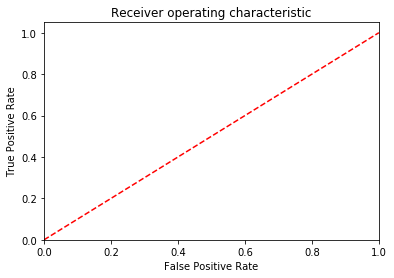

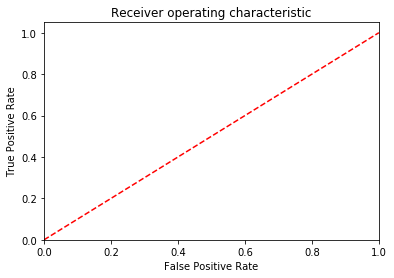

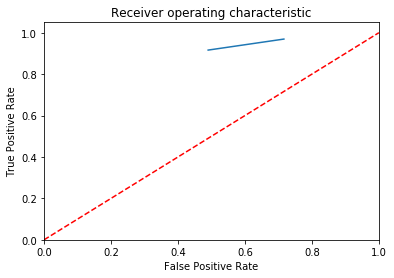

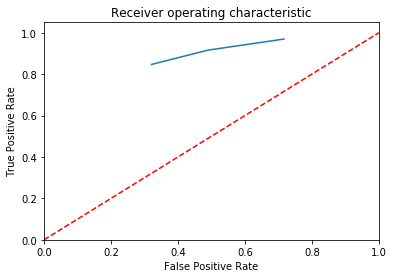

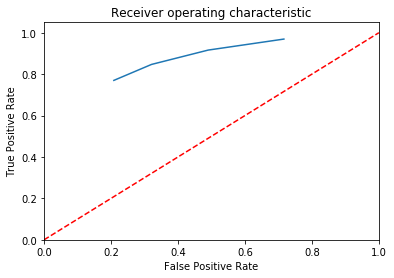

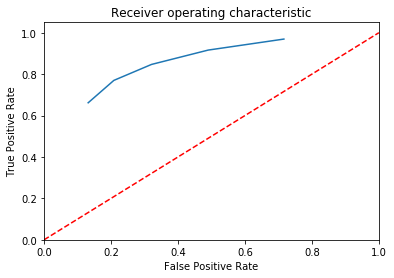

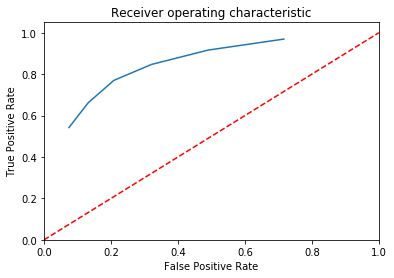

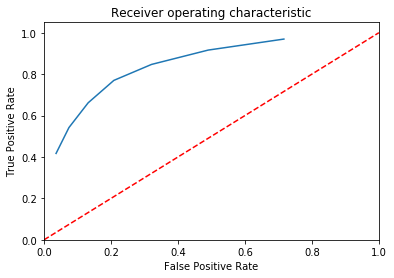

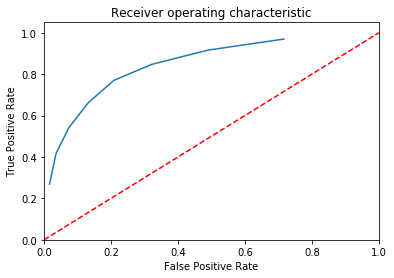

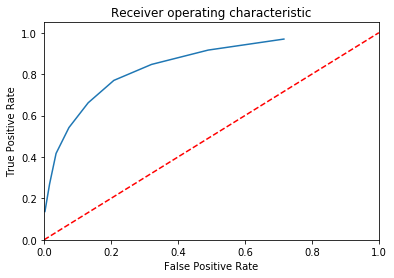

				For model LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=0, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=True)


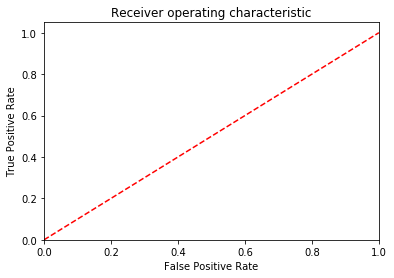

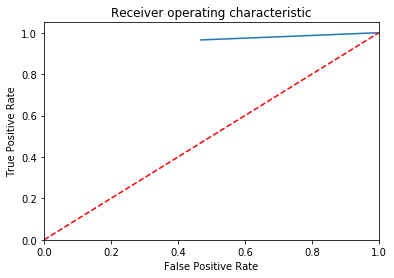

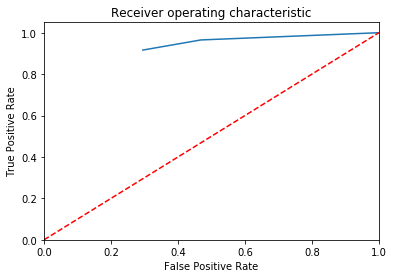

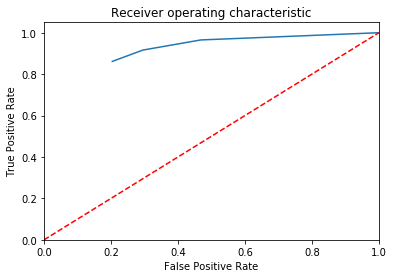

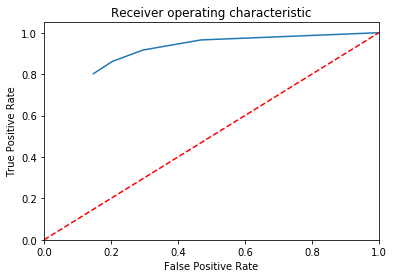

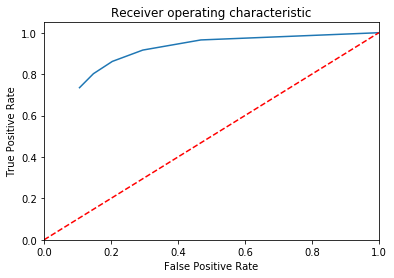

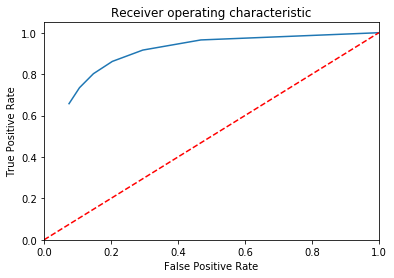

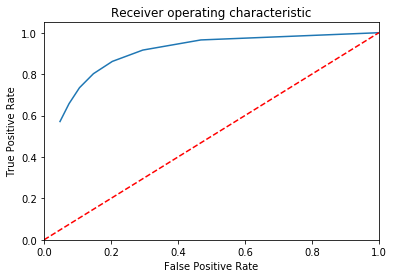

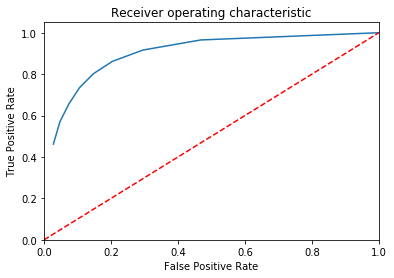

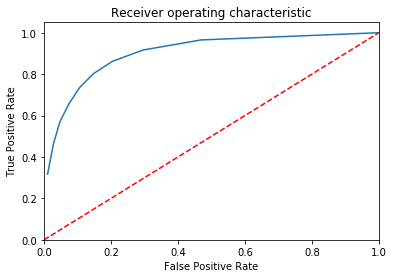

				For model SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='poly',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


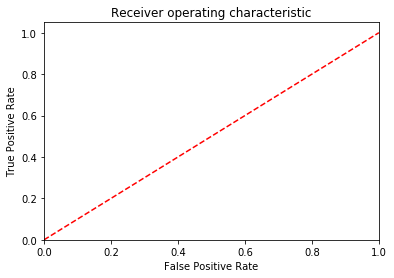

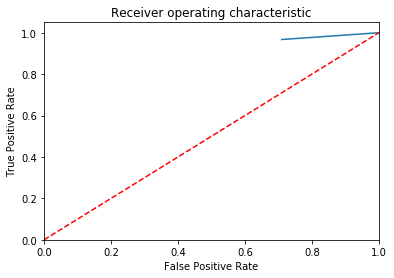

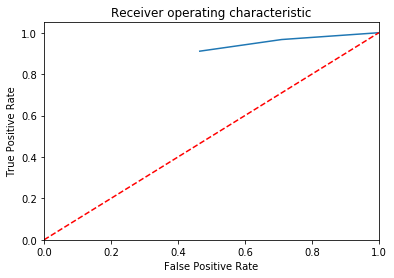

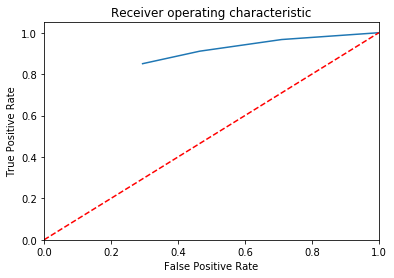

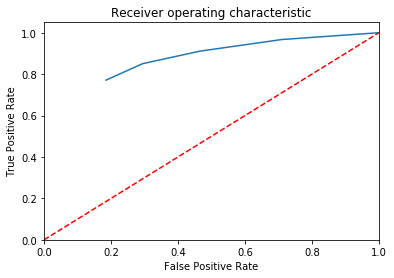

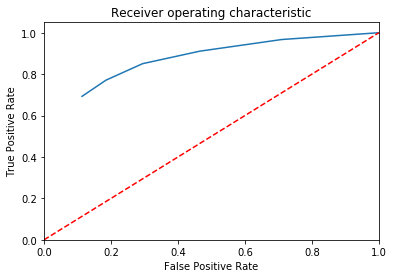

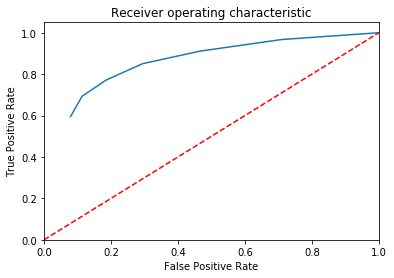

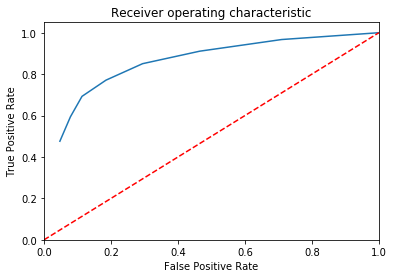

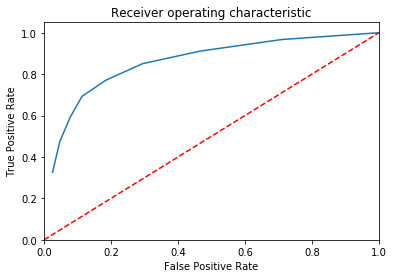

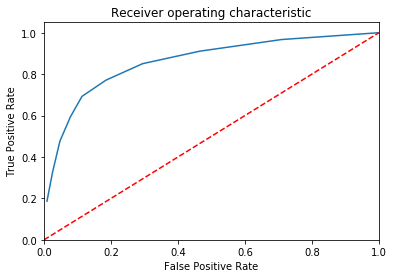

In [79]:
#Plotting the ROC for each of the above models
makeROC(mKnn, X_testKnn, y_testKnn)
makeROC(mLog, X_testLog, y_testLog)
makeROC(mSvm, X_testSvm, y_testSvm)

## 4. How large a role does country play?

Based on the above analyses, Logistic regression is the best regression technique. Hence, going forth with this technique

In [80]:
#Separating into test and train data
X_trainLog, X_testLog, y_trainLog, y_testLog = train_test_split(x,y, test_size=0.2, random_state=42)
#Fitting a logistic model
mLog = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr', 
                                   max_iter = 100, n_jobs = -1, warm_start = True)
mLog.fit(X_trainLog, y_trainLog)

#Preedicting the y_hat values
y_predLog = mLog.predict(X_testLog)
print("Accuracy of this model is:", mLog.score(X_testLog, y_testLog))

calculateCM(y_testLog, y_predLog)

Accuracy of this model is: 0.8353097010218241


				Manually calculated values are:

    precision    recall  f1-score  accuracy
0    0.80213  0.734474  0.766813   0.83531


Confusion matrix:

       0     1
0  8950  1059
1  1552  4293


				Automatically calculated values are:

               precision    recall  f1-score   support

           0       0.85      0.89      0.87     10009
           1       0.80      0.73      0.77      5845

   micro avg       0.84      0.84      0.84     15854
   macro avg       0.83      0.81      0.82     15854
weighted avg       0.83      0.84      0.83     15854



Confusion matrix:

 [[8950 1059]
 [1552 4293]]


In [91]:
#removing unwanted columns
unwantedColumns = [column for column in x.columns if (column.lower().startswith('country'))]
x2 = wvsData2.drop(unwantedColumns,1)
x2 = x2.drop(['abortion'],1)
y = wvsData2['abortion']

In [92]:
#Separating into test and train data
X_trainLog, X_testLog, y_trainLog, y_testLog = train_test_split(x2,y, test_size=0.2, random_state=42)
#Fitting a logistic model
mLog = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr', 
                                   max_iter = 100, n_jobs = -1, warm_start = True)
mLog.fit(X_trainLog, y_trainLog)

#Preedicting the y_hat values
y_predLog = mLog.predict(X_testLog)
print("Accuracy of this model is:", mLog.score(X_testLog, y_testLog))

calculateCM(y_testLog, y_predLog)

Accuracy of this model is: 0.835057398763719


				Manually calculated values are:

    precision    recall  f1-score  accuracy
0   0.803686  0.731223  0.765744  0.835057


Confusion matrix:

       0     1
0  8965  1044
1  1571  4274


				Automatically calculated values are:

               precision    recall  f1-score   support

           0       0.85      0.90      0.87     10009
           1       0.80      0.73      0.77      5845

   micro avg       0.84      0.84      0.84     15854
   macro avg       0.83      0.81      0.82     15854
weighted avg       0.83      0.84      0.83     15854



Confusion matrix:

 [[8965 1044]
 [1571 4274]]


On removing the country dummy variables from the data set, we found that there is no significant change in the accuracy of the Logistic Regression model when the country dummy variables were removed.

### Remove the few highly correlated variables: V203A, V207, V206, V203, V205, revolving around the views on homosexuality, prostitution, divorce, and such.

In [98]:
#removing unwanted columns
x3 = wvsData2.drop(['abortion','V203A', 'V207', 'V206', 'V203', 'V205'],1)
y = wvsData2['abortion']

In [99]:
#Separating into test and train data
X_trainLog, X_testLog, y_trainLog, y_testLog = train_test_split(x3,y, test_size=0.2, random_state=42)
#Fitting a logistic model
mLog = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr', 
                                   max_iter = 100, n_jobs = -1, warm_start = True)
mLog.fit(X_trainLog, y_trainLog)

#Preedicting the y_hat values
y_predLog = mLog.predict(X_testLog)
print("Accuracy of this model is:", mLog.score(X_testLog, y_testLog))

calculateCM(y_testLog, y_predLog)

Accuracy of this model is: 0.7937429039989908


				Manually calculated values are:

    precision    recall  f1-score  accuracy
0   0.755507  0.651326  0.699559  0.793743


Confusion matrix:

       0     1
0  8777  1232
1  2038  3807


				Automatically calculated values are:

               precision    recall  f1-score   support

           0       0.81      0.88      0.84     10009
           1       0.76      0.65      0.70      5845

   micro avg       0.79      0.79      0.79     15854
   macro avg       0.78      0.76      0.77     15854
weighted avg       0.79      0.79      0.79     15854



Confusion matrix:

 [[8777 1232]
 [2038 3807]]


In [100]:
#removing unwanted columns
unwantedColumns = [column for column in x.columns if (column.lower().startswith('country'))]
x4 = x3.drop(unwantedColumns,1)

In [101]:
X_trainLog, X_testLog, y_trainLog, y_testLog = train_test_split(x4,y, test_size=0.2, random_state=42)
#Fitting a logistic model
mLog = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr', 
                                   max_iter = 100, n_jobs = -1, warm_start = True)
mLog.fit(X_trainLog, y_trainLog)

#Preedicting the y_hat values
y_predLog = mLog.predict(X_testLog)
print("Accuracy of this model is:", mLog.score(X_testLog, y_testLog))

calculateCM(y_testLog, y_predLog)

Accuracy of this model is: 0.7923552415794122


				Manually calculated values are:

    precision    recall  f1-score  accuracy
0   0.752822  0.650299  0.697815  0.792355


Confusion matrix:

       0     1
0  8761  1248
1  2044  3801


				Automatically calculated values are:

               precision    recall  f1-score   support

           0       0.81      0.88      0.84     10009
           1       0.75      0.65      0.70      5845

   micro avg       0.79      0.79      0.79     15854
   macro avg       0.78      0.76      0.77     15854
weighted avg       0.79      0.79      0.79     15854



Confusion matrix:

 [[8761 1248]
 [2044 3801]]


After removing highly correlated columns we observed that:
* The accuracy of the model slightly decreased from 83% to 79%.
* There is still no change in accuracy when the country dummy variables are removed

Thus, from this experiment we can conclude that introducing dummy varibales did not affect the performace of the logistic regression in determining the response varaible, abortion.